# Programming exercise 6: Support vector machines
Here are my solutions for this exercise. Jupyter notebook template modified from: https://github.com/dibgerge/ml-coursera-python-assignments. The following article was used to implement sklearn's SVM module: https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-support-vector-machines-435fc34b7bf9

In [2]:
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## 1 Support vector machines
For this exercise, I will be using support vector machines (SVM) on various 2D datasets. Do note that `sklearn` is used for this exercise.

### 1.1 Example dataset 1

In [3]:
# Read data
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y']

print ('Data\t\tShape')
print (f'X\t\t{X.shape}')
print (f'y\t\t{y.shape}')

Data		Shape
X		(51, 2)
y		(51, 1)


In [4]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. 
    `X` is assumed to be a Mx2 matrix
    
    Parameters
    ----------
    X : numpy ndarray
        X is assumed to be a Mx2 matrix.
    y : numpy ndarray
        The data labels.
    """
    pos = y.ravel() == 1
    neg = y.ravel() == 0
    fig = plt.scatter(X[pos, 0], 
                      X[pos, 1], 
                      label='Positive', 
                      color='cornflowerblue')

    fig = plt.scatter(X[neg, 0], 
                      X[neg, 1], 
                      label='Negative', 
                      color='coral')
    
    plt.xlabel(r'$X1$')
    plt.ylabel(r'$X2$')
    plt.legend()

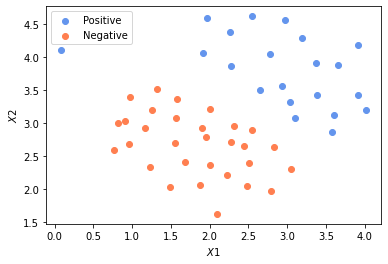

In [5]:
plotData(X, y)

Text(0.5, 1.0, 'SVM decision boundary with $C = 1$')

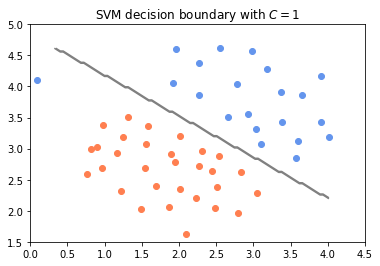

In [6]:
from sklearn.svm import SVC

# With C = 1
classifier = SVC(C=1, kernel='linear')
classifier.fit(X, y.ravel())

# Plot decision boundary
pos = y.ravel() == 1
neg = y.ravel() == 0
fig = plt.scatter(X[pos, 0], 
                  X[pos, 1], 
                  label='Positive', 
                  color='cornflowerblue')

fig = plt.scatter(X[neg, 0], 
                  X[neg, 1], 
                  label='Negative', 
                  color='coral')

X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),
                                   X[:, 0].max(),
                                   num=100),
                       np.linspace(X[:, 1].min(),
                                   X[:, 1].max(),
                                   num=100))

fig = plt.contour(X_1, X_2,
                  classifier.predict(np.array([X_1.ravel(),
                                               X_2.ravel()]).T).reshape(X_1.shape),
                                    1, colors='grey')
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)
plt.title(r'SVM decision boundary with $C = 1$')

Text(0.5, 1.0, 'SVM decision boundary with $C = 100$')

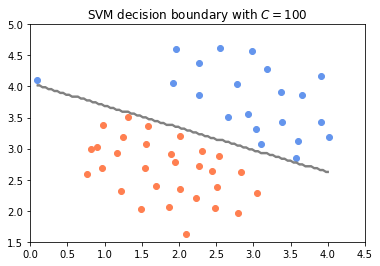

In [7]:
from sklearn.svm import SVC

# With C = 100 - Increasing C results in low bias and high variance
classifier = SVC(C=100, kernel='linear')
classifier.fit(X, y.ravel())

# Plot decision boundary
pos = y.ravel() == 1
neg = y.ravel() == 0
fig = plt.scatter(X[pos, 0], 
                  X[pos, 1], 
                  label='Positive', 
                  color='cornflowerblue')

fig = plt.scatter(X[neg, 0], 
                  X[neg, 1], 
                  label='Negative', 
                  color='coral')

X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),
                                   X[:, 0].max(),
                                   num=100),
                       np.linspace(X[:, 1].min(),
                                   X[:, 1].max(),
                                   num=100))

fig = plt.contour(X_1, X_2,
                  classifier.predict(np.array([X_1.ravel(),
                                               X_2.ravel()]).T).reshape(X_1.shape),
                                    1, colors='grey')
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)
plt.title(r'SVM decision boundary with $C = 100$')

### 1.2 SVM with Gaussian kernels

The `gaussianKernel` returns the similarity between x1 and x2 using a Gaussian kernel.

#### 1.2.1 Gaussian kernel implementation

In [8]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    similairty : float
        The computed RBF between the two provided data points.
    """
    
    similarity = np.exp(-(np.sum(np.square(x1 - x2)) / (2 * (sigma**2))))
    return similarity

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print (f'Gaussian kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {sigma}: \n{sim:.6f}')
print ('(for sigma = 2, this value should be about 0.324652)'.format(sigma, sim))

Gaussian kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2: 
0.324652
(for sigma = 2, this value should be about 0.324652)


#### 1.2.2 Example dataset 2

In [10]:
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y']

print ('Data\t\tShape')
print (f'X\t\t{X.shape}')
print (f'y\t\t{y.shape}')

Data		Shape
X		(863, 2)
y		(863, 1)


Text(0.5, 1.0, 'SVM decision boundary with $C = 100$')

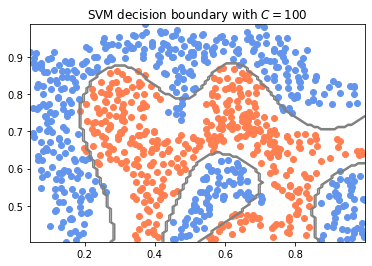

In [11]:
from sklearn.svm import SVC

# Parameters
C = 100
gamma = 10

# Classifier
classifier = SVC(C=C, kernel='rbf', gamma=gamma)
classifier.fit(X, y.ravel())

# Plot decision boundary
pos = y.ravel() == 1
neg = y.ravel() == 0
fig = plt.scatter(X[pos, 0], 
                  X[pos, 1], 
                  label='Positive', 
                  color='cornflowerblue')

fig = plt.scatter(X[neg, 0], 
                  X[neg, 1], 
                  label='Negative', 
                  color='coral')

X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),
                                   X[:, 0].max(),
                                   num=100),
                       np.linspace(X[:, 1].min(),
                                   X[:, 1].max(),
                                   num=100))

fig = plt.contour(X_1, X_2,
                  classifier.predict(np.array([X_1.ravel(),
                                               X_2.ravel()]).T).reshape(X_1.shape),
                                    1, colors='grey')

plt.title(r'SVM decision boundary with $C = 100$')

#### 1.2.3 Example dataset 3

In [12]:
data = sio.loadmat('ex6data3.mat')
data
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

print ('Data\t\tShape')
print (f'X\t\t{X.shape}')
print (f'y\t\t{y.shape}')
print (f'Xval\t\t{Xval.shape}')
print (f'yval\t\t{yval.shape}')

Data		Shape
X		(211, 2)
y		(211, 1)
Xval		(200, 2)
yval		(200, 1)


In [13]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use 
    for SVM with RBF kernel.
    
    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y : array_like
        (m, ) vector of labels for ther training data.
    
    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    yval : array_like
        (mv, ) vector of labels for the validation data.
    
    Returns
    -------
    C_pick, gamma_pick : float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.
    """
    
    # Parameters
    C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigmoid = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    gamma = np.array(sigmoid) * 10 #gamma is approximately similar to 1/σ
    kernel = 'rbf'
    results = []
    
    for i in range(len(C)):
        for j in range(len(gamma)):
            
            classifier = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
            classifier.fit(X, y.ravel())
            
            y_val_pred = classifier.predict(Xval)
            score = classifier.score(Xval, yval)
            
            results.append([C[i], gamma[j], score])
             
    results = np.array(results) # To view the change in accuracy
    results_argmax = np.argmax(results, axis=0)
    picks = results[results_argmax[2], :]
    
    C_pick, gamma_pick = picks[0], picks[1]
    
    return C_pick, gamma_pick

Text(0.5, 1.0, 'SVM decision boundary for dataset 3')

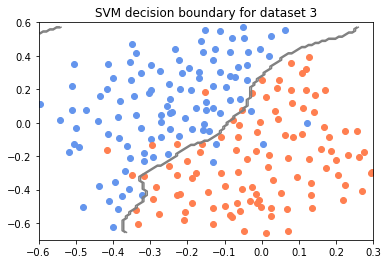

In [14]:
# Select best parameters
C, gamma = dataset3Params(X, y, Xval, yval)

# Classifier
classifier = SVC(C=C, kernel='rbf', gamma=gamma)
classifier.fit(X, y.ravel())

# Plot decision boundary
pos = y.ravel() == 1
neg = y.ravel() == 0
fig = plt.scatter(X[pos, 0], 
                  X[pos, 1], 
                  label='Positive', 
                  color='cornflowerblue')

fig = plt.scatter(X[neg, 0], 
                  X[neg, 1], 
                  label='Negative', 
                  color='coral')

X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),
                                   X[:, 0].max(),
                                   num=100),
                       np.linspace(X[:, 1].min(),
                                   X[:, 1].max(),
                                   num=100))

fig = plt.contour(X_1, X_2,
                  classifier.predict(np.array([X_1.ravel(),
                                               X_2.ravel()]).T).reshape(X_1.shape),
                                    1, colors='grey')
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title(r'SVM decision boundary for dataset 3')

## 2 Spam classification
I will now be using SVM to build an email classifier.

In [15]:
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import re
from nltk import PorterStemmer

In [18]:
# Read emailSample1.txt
print ('\nPreprocessing sample email (emailSample1.txt)\n')
with open('emailSample1.txt', 'r') as f:
    file_contents = f.read()

print(file_contents)


Preprocessing sample email (emailSample1.txt)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [17]:
# Read emailSample1.txt
print ('\nPreprocessing sample email (spamSample1.txt)\n')
with open('spamSample1.txt', 'r') as f:
    file_contents = f.read()

print(file_contents)


Preprocessing sample email (spamSample1.txt)

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72




### 2.1 Preprocessing emails

In [19]:
def processEmail(email_contents):
    """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    Returns
    -------
    words : list
        A list of word tokens.
        
    word_indices : list
        A list of integers containing the index of each word in the 
        email which is also present in the vocabulary.
    """
    
    # ================== Preprocess Email =================#
    
    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    email_contents = re.sub('<[^<>]+>',' ', email_contents)
    
    # Normalize numbers
    email_contents = re.sub('\d+', 'number', email_contents)
    
    # Normalize URL
    email_contents = re.sub('(http|https)://.*', 'httpaddr', email_contents)
    
    # Normalize email address
    email_contents = re.sub('(.*)@(.*)\..*', 'emailaddr', email_contents)
        
    # Normalize dollars
    dollar = re.compile('\$+')
    email_contents = re.sub(dollar, 'dollar ', email_contents)
    
    words = split(""" @$/#.-:&*+=[]?!(){},'">_<;%\n\r""", email_contents)
    
    # Stem email contents
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if len(word) > 0]
    
    # Load vocab_list
    vocab = getVocabList()
    
    # Match words with vocab
    word_indices = [value for word in words for key, value in vocab.items() if key == word]

    return words, word_indices

In [20]:
def split(delimiters, string, maxsplit=0):
    """
    Function that takes strings of delimiters,
    adds escape characters, and splits words accordingly.
    """
    
    pattern = '|'.join(map(re.escape, delimiters))
    return re.split(pattern, string, maxsplit)

In [21]:
words, word_indices = processEmail(file_contents)
print ('Words:', words)
print ('\nWord indices: ', word_indices)

Words: ['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', 're', 'expect', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollar', 'number', 'you', 'should', 'checkout', 'httpaddr', 'if', 'your', 'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr']

Word indices:  [85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1892, 1363, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


#### 2.1.1 Vocabulary list

In [22]:
def getVocabList():
    """
    Reads the fixed vocabulary list in vocab.txt and 
    returns a cell array of the words
    
    """
    
    with open('vocab.txt', 'r') as f:
        vocab_list = f.read()
    
    vocab_list = re.sub('\n', ' ', vocab_list)
    vocab_list = re.sub('\d+', '', vocab_list)
    vocab_list = re.sub('\t', '', vocab_list)
    vocab_list = vocab_list.split()
    
    # Convert list to dict for quicker mapping
    vocab_dict = {vocab_list[i]: i for i in range(len(vocab_list))}
    
    return vocab_dict

### 2.2 Extracting features from emails

In [23]:
def emailFeatures(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices. 
    
    Parameters
    ----------
    word_indices : list
        A list of word indices from the vocabulary list.
    
    Returns
    -------
    feature_vector : np.array 
        The computed feature vector.
    """
    
    # Initalize important parameters
    n = len(getVocabList()) # Total number of words in vocab list
    
    feature_vector = np.zeros((n,1))
    feature_vector[word_indices] = 1
    
    return feature_vector

In [24]:
features = emailFeatures(word_indices)
print(f'Length of feature vector: {len(features)}')
print(f'Number of non-zero entries: {np.sum(features):.0f}')

# Note, number of non-zero entries are slightly different to 
# assignment as "you're" was captured as "you" and "re".

Length of feature vector: 1899
Number of non-zero entries: 43


### 2.3 Training SVM for spam classification

In [25]:
# Load data set
print ('Load datasets\n-----------------')
data = sio.loadmat('spamTrain.mat')
X = data['X']
y = data['y'].ravel()

data = sio.loadmat('spamTest.mat')
X_test = data['Xtest']
y_test = data['ytest'].ravel()

print ('Data\t\tShape')
print (f'X\t\t{X.shape}')
print (f'y\t\t{y.shape}')
print (f'X_test\t\t{X_test.shape}')
print (f'y_test\t\t{y_test.shape}')

# Train SVM
print ('\nTraining SVM...')
C = 0.1
kernel = 'linear'
classifier = SVC(C=C, kernel=kernel, gamma=gamma)
classifier.fit(X, y)

# Predict
y_pred = classifier.predict(X_test)

# Accuracy scores
test_score = classifier.score(X, y)
train_score = classifier.score(X_test, y_test)

print ('Training complete')
print ('\nResults\n-----------------')
print (f'Training accuracy:\t{test_score*100:.1f} %')
print (f'Test accuracy:\t\t{train_score*100:.1f} %')

Load datasets
-----------------
Data		Shape
X		(4000, 1899)
y		(4000,)
X_test		(1000, 1899)
y_test		(1000,)

Training SVM...
Training complete

Results
-----------------
Training accuracy:	99.8 %
Test accuracy:		98.9 %


### 2.4 Top predictors for spam

In [26]:
# Code for the following was modified from: 
# https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-support-vector-machines-435fc34b7bf9

vocab = getVocabList()
weights = classifier.coef_[0].reshape((len(vocab), 1))
vocab_weights = pd.DataFrame(weights, vocab)
vocab_weights.columns = ['weights']

# Find words that with the highest weights
vocab_weights.sort_values(by=['weights'], ascending=False, inplace=True)
print('Top predictors of spam')
vocab_weights[0:16]

Top predictors of spam


,weights
our,0.500614
click,0.465916
remov,0.422869
guarante,0.383622
visit,0.367710
basenumb,0.345064
dollar,0.323632
will,0.269724
price,0.267298
pleas,0.261169
